In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import scipy.optimize as scpo

levels = [1,2,3,5,7,10,20,30,50,70,100,125,150,175,200,225,250,300,350,400,450,500,550,600,650,700,750,775,800,825,850,875,900,925,950,975,1000]

In [2]:
def eval_Data(Data,n_bins=1250):
    _,bins= np.histogram(Data["k"],bins = n_bins)
    bins_label = pd.cut(Data["k"],bins,labels=range(n_bins))
    Data["bins"] = bins_label

    ks = [n*(Data.max()["k"]-Data.min()["k"])/(n_bins) for n in range(n_bins)]
    mean_Data_bin = []

    for b in range(1,n_bins): 
        mean_Data_bin.append(1/len(Data[Data["bins"] == b]["E(k) "])*Data[Data["bins"] == b]["E(k) "].mean())

    return pd.DataFrame({"k":ks[1::],"Emean":mean_Data_bin})

ex = 5
def fit_func(k,A):
        return A*k**(-ex)

def fit_data(Data):
    
    popt,pcov = scpo.curve_fit(fit_func,Data[Data.columns[0]],Data[Data.columns[1]])

    return popt,pcov

In [3]:
def Plotting(year):
    print("Plotting {}".format(year))
    file_list = [i for i in os.listdir("./Results_Data/{}/Kolmogorov/".format(year)) if((not i.endswith("_ann.csv")) and (not i.endswith("_month.csv"))) and (not i.endswith(".ipynb_checkpoints"))]
    annual_Df = pd.DataFrame(columns=["k","E(k) "])

    annual_Df["k"] = pd.read_csv("./Results_Data/{}/Kolmogorov/{}".format(year,file_list[0]))["k"]
    annual_Df["E(k) "]= 0

    for f in file_list: 
        pl = int(f.split(".csv")[0].split("_")[2])
        weight = pl/sum(levels) #-1/(0.146)*np.log(pl/1060.9)/sum([-1/(0.146)*np.log(p/1060.9) for p in levels])   #1/sum([-1/(0.146)*np.log(p/1060.9) for p in levels])     
        Data = pd.read_csv("./Results_Data/{}/Kolmogorov/{}".format(year,f))["E(k) "]
        annual_Df["E(k) "]+= weight*Data
    #print("pressure level: {} \t weight: {}".format(pl,weight))

    annual_Df_mean_Data = eval_Data(annual_Df)

    fData_a = annual_Df_mean_Data.copy()

    lb = fData_a[fData_a["Emean"] == fData_a.max()["Emean"]]["k"].array[0]

#print("left border: {} \t right border: {}".format(lb,2/3*639))
    fData_a = fData_a[(fData_a["k"] >= lb) & (fData_a["k"] <= 426.0)]

    p,cov = fit_data(fData_a)

    if year % 10 == 0: 
        plt.cla()
        plt.plot(annual_Df_mean_Data["k"],annual_Df_mean_Data["Emean"])
        plt.vlines([lb,2/3*639],np.min(annual_Df_mean_Data["Emean"])*1/10,np.max(annual_Df_mean_Data["Emean"])*10,color="lightskyblue",linestyle="dashed",label="k_l and k_r")
        plt.plot(fit_func(fData_a["k"],p),label="A={:.2f}".format(p[0]))
        plt.loglog()
        plt.xlabel("wavenumber k")
        plt.ylabel("mean kinetic Energy")
        plt.legend()
        plt.savefig("./Plots_Kolmogorov/Result_{}.pdf".format(year))
    print("{} done".format(year))

    return p,cov,lb

Plotting 1940
1940 done
Plotting 1941
1941 done
Plotting 1942
1942 done
Plotting 1943
1943 done
Plotting 1944
1944 done
Plotting 1945
1945 done
Plotting 1946
1946 done
Plotting 1947
1947 done
Plotting 1948
1948 done
Plotting 1949
1949 done
Plotting 1950
1950 done
Plotting 1951
1951 done
Plotting 1952
1952 done
Plotting 1953
1953 done
Plotting 1954
1954 done
Plotting 1955
1955 done
Plotting 1956
1956 done
Plotting 1957
1957 done
Plotting 1958
1958 done
Plotting 1959
1959 done
Plotting 1960
1960 done
Plotting 1961
1961 done
Plotting 1962
1962 done
Plotting 1963
1963 done
Plotting 1964
1964 done
Plotting 1965
1965 done
Plotting 1966
1966 done
Plotting 1967
1967 done
Plotting 1968
1968 done
Plotting 1969
1969 done
Plotting 1970
1970 done
Plotting 1971
1971 done
Plotting 1972
1972 done
Plotting 1973
1973 done
Plotting 1974
1974 done
Plotting 1975
1975 done
Plotting 1976
1976 done
Plotting 1977
1977 done
Plotting 1978
1978 done
Plotting 1979
1979 done
Plotting 1980
1980 done
Plotting 1981
19

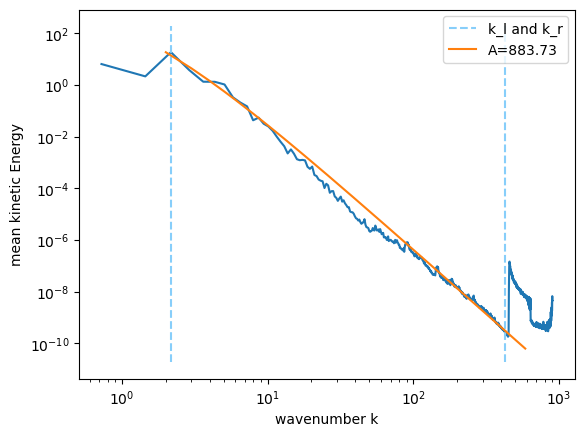

In [4]:
year_list = sorted([int(n) for n in os.listdir("./Results_Data/") if (not n.endswith(".ipynb_checkpoints"))]) #and (int(n) % 10 == 0)])
As = []
As_error = []
kls = []

for year in year_list: 
    A,A_error,kl = Plotting(year)
    As.append(A[0])
    As_error.append(A_error[0])
    kls.append(kl)

In [1]:
plt.errorbar(year_list,As,np.sqrt(As_error).reshape(85,),marker="o",markersize=4,color="tomato")
plt.xlabel("year")
plt.ylabel("prefactor A")
plt.savefig("./Plots_Kolmogorov/A_Evolution.pdf")

NameError: name 'plt' is not defined

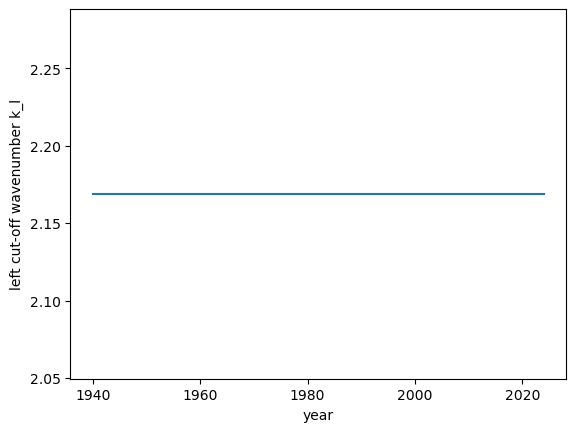

In [7]:
plt.plot(year_list,kls)
plt.ylabel("left cut-off wavenumber k_l")
plt.xlabel("year")
plt.savefig("./Plots_Kolmogorov/Evolution_of_kl.pdf")

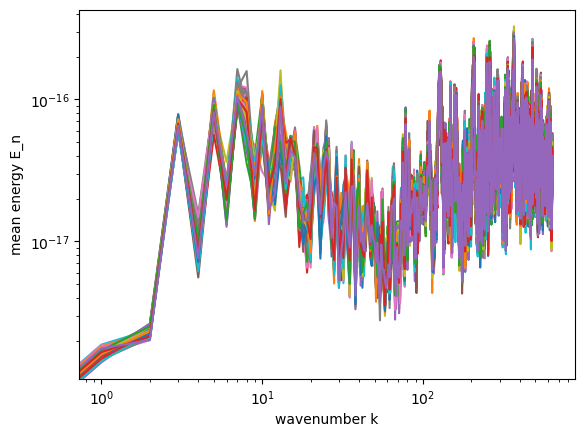

In [29]:
# plot mean for every pressure level for every year 
mean_Df = pd.DataFrame(index= [i for i in os.listdir("./Results_Data/") if not i.endswith(".ipynb_checkpoints")], columns=[i for i in range(0,639)])

for f in [i for i in os.listdir("./Results_Data/") if not i.endswith(".ipynb_checkpoints")]:
    
    Data = pd.read_csv("./Results_Data/{}/spectral_res_pressure_levels_{}.csv".format(f,f),names=[i for i in range(0,639)])
    Data.index = levels
    w_Data = Data.index/(sum(Data.index))*Data.T
    avg_Data = w_Data.sum(axis=1)
    
    plt.plot(avg_Data)
    plt.loglog()
    plt.xlabel("wavenumber k")
    plt.ylabel("mean energy E_n")
    #plt.title("mean energy over all 37 pressure levels, 1940-2024 ".format(f))
#    plt.savefig("./Plots/mean_energy_{}.pdf".format(year))
#    plt.close()
    
    mean_Df.loc[f] = avg_Data.T
plt.savefig("./Plots/mean_inner_sum_E_n.pdf")

In [25]:
mean_Df

,0,1,2,3,4,5,6,7,8,9,...,629,630,631,632,633,634,635,636,637,638
1954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
